Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE", as well as your name below:

In [1]:
NAME = "Thomas J Matthew"

---

# Problem 1

The data frame `iris` is built into base R. Write code to create two data frames:

- One data frame with only the setosa and virginica species. Give this data frame the name `SV`. Remove the `Petal.Width` variable from the data frame.
- One data frame with only the versicolor and virginica species. Give this data frame the name `VV`. Remove the `Sepal.Length` variable from this data frame. 

Hint: This is easiest using the `subset` function.

In [73]:
# Load the data into the R workspace
data("iris") # Note that the data frame name must be in quotes

SV <- subset(iris, Species == 'setosa' | Species == 'virginica',
            select = c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Species'))
VV <- subset(iris, Species == 'versicolor' | Species == 'virginica',
            select = c('Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'))

Note that the `iris` dataset includes 50 observations from each of the three species.

In [74]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [75]:
intersect(colnames(SV), colnames(VV))
SV_VV_merge <- merge(SV,VV,all=TRUE)
table(SV_VV_merge$Species)

[1] "Sepal.Width"  "Petal.Length" "Species"


    setosa versicolor  virginica 
        50         50         66 

Explain why the following merge has 66 observations for the virginica species.

Performing the merge of `SV` and `VV` with the argument `all = TRUE` makes this a full outer join.  This merge returns all entries for both data frames.  The merge will match columns in common, like `Sepal.Width` `Petal.Length` and `Species`, since no specific merge column is chosen in the arguments.  However, the merge will also create seperate entries for common species, in this case `virginica`, due to asymmetric columns `Petal.Width` and `Sepal.Length`.  The merge thus have extra entries for `virginica` with `Petal.Width` and without (NA values) for `Sepal.Length` (as in dataframe `SV`), and vice versa for data frame `VV`.  This occurance happens 16 times.

---

# Problem 2

Create a new environment named `giga`, and within this environment, create the following objects:

- A numeric vector of all of the numbers between 1 and 5 named `a`
- A logical (TRUE/FALSE) vector with 5 elements. Name this vector `b`.
- A $3 \times 2$ character matrix of your favorite colors (Pro tip: Base R recognizes 657 colors and hues by name, including `cornflowerblue`. You can see all of these names by running the command `colors()`.). Name this character matrix `my_cols`.
- An environment named `mega`, which contains a numeric vector of all of the numbers between 6 and 9 named `a`.

In [1]:
# YOUR CODE HERE

giga <- new.env()
giga$a <- 1:5
giga$b <- logical(length = 5)
giga$my_cols <- matrix(c('chartreuse', 'thistle', 'peru', 
                          'blue3', 'coral', 'plum'),
                        nrow=3, ncol=2)

mega <- new.env(parent=giga)
mega$a <- 6:9

In [2]:
giga$a
giga$b
giga$my_cols
mega$a

[1] 1 2 3 4 5

[1] FALSE FALSE FALSE FALSE FALSE

chartreuse,blue3
thistle,coral
peru,plum


[1] 6 7 8 9

What does the message following this code mean?

In [3]:
attach(giga)
attach(mega)

The following object is masked from giga:

    a



In [4]:
a

[1] 6 7 8 9

The message: "`The following object is masked from giga:   a`" occurs when connecting to path containing environment bindings of `giga`, then connecting to the child environment `mega`.  The message indicates that there are multiple instances of the `a` name, and to limit confusion about which `a` is used, the interpreter uses the `a` that is instantiated in the most recently attached environment `mega` and masked in parent environment `a`.  This means that `a` is now refering to the integer vector `6:9` defined in `mega` rather than the integer vector `1:5` defined in `giga`.

Let's detach the environments again.

In [5]:
detach(mega)
detach(giga)

Why doesn't this work?

In [1]:
attach(mega)
attach(giga)

ERROR: Error in attach(mega): object 'mega' not found


The object `mega` not found if `mega` is attached before `giga`, this throwing the error: "`Error in attach(mega): object 'mega' not found   Traceback:  1. attach(mega)`".  This is because the pointer for the `mega` environment is in the parent environment `giga`, and this cannot be found unless you're attached to `giga` first.

---

# Problem 3

For this problem, you will need the `Grade_Example.xlsx` file, which will be posted on Canvas. This Excel workbook contains three sheets, `Worksheets_and_Quizzes`, `Labs`, and `Exams`. Make the appropriate adjustments to the Excel spreadsheet and read each of the three sheets into three data frames, named `quiz`, `lab`, and `exam`, respectively. Note that there is a header for all of these sheets in Excel. The data in this workbook includes a student's unique ID and their grades on assignments and exams in an elementary statistics class. 

In [2]:
# YOUR CODE HERE
quiz <- read.csv('Grade_Example_quiz.csv')

lab <- read.csv('Grade_Example_lab.csv')

exam <- read.csv('Grade_Example_exam.csv')

The following code performs a left join and a right join on the lab and quiz data frames. Why does the left join have fewer rows than the right join?

In [3]:
left <- merge(lab,quiz,all.x=TRUE)
right <- merge(lab,quiz,all.y=TRUE)
dim(left)
dim(right)

[1] 28 23

[1] 29 23

The right join has one more row because a right join preserves all the row entires from that data frame (eg `quiz`) whether or not they are in the left data frame (eg `lab`).  This just demonstrates there is an extra row in the `quiz` data compared to `lab`.  That row corresponds with the Student ID 6776072.

Join all three data frames together into one data frame names `grades`. Be sure that all of the students are included in the `grades` data frame!

In [7]:
grades <- merge(merge(quiz, lab, by='ID', all=T), exam, by='ID', all=T)
grades[is.na(grades)] <- 0  # replaces NA values with zeros, per spec

Change the `grades` data frame so that the missing data (`NA`) are all zeros.

Hint: Use the `is.na` function in R to identify which cells in the data frame are missing data.

In [8]:
# This will test to see that you have the correct number of students
stopifnot(dim(grades)[1] == 29)

---

# Problem 4

If `b <- list(one = c("Santa","Cruz","California","UCSC","Go Slugs!"), two = 1:5, three=c(FALSE,FALSE,TRUE))`, write an R expression that will give all elements, except the second, of `b`.

In [9]:
b <- list(one = c("Santa","Cruz","California","UCSC","Go Slugs!"), two = 1:5, three=c(FALSE,FALSE,TRUE))
b[c('one','three')]


$one
[1] "Santa"      "Cruz"       "California" "UCSC"       "Go Slugs!" 

$three
[1] FALSE FALSE  TRUE

---

# Problem 5

Let `my_text <- "University of California, Santa Cruz"`. Write code to split this string and return the following output:

```
[[1]]
[1] "University of California"

[[2]]
[1] "Santa Cruz"
```

In [10]:
my_text <- "University of California, Santa Cruz"
as.list(strsplit(my_text, split=", ")[[1]])


[[1]]
[1] "University of California"

[[2]]
[1] "Santa Cruz"

---

# Problem 6

For the following code, matrix-multiply the second and fourth list elements together. Name the matrix product `bayes`.

In [11]:
set.seed(8675309) # This ensures that the random numbers generated are the same for everyone
the_list <- list(
    abel = "bayesian",
    abc = matrix(rnorm(6),3,2),
    tommy = "jenny",
    def = matrix(rnorm(6),2,3))


bayes <- the_list$abc %*% the_list$def

Now test to see that `bayes` has the correct dimensions.

In [12]:
set.seed(8675309)
stopifnot(dim(bayes) == c(3,3))

---

# Problem 7

The list `x` appears in R as

In [13]:
x <- list(do = c(1,9,6,5),
         re = c("me","fa","so"),
         la = c("ti","do"))
x

$do
[1] 1 9 6 5

$re
[1] "me" "fa" "so"

$la
[1] "ti" "do"

Replace the character string 'me' with the string 'mi'.

In [14]:
# YOUR CODE HERE
x[['re']][1] <- "mi"
x

$do
[1] 1 9 6 5

$re
[1] "mi" "fa" "so"

$la
[1] "ti" "do"

In [15]:
# This chunk tests that the replacement worked

---

# Problem 8

Why does the following code produce an error?

In [57]:
santa_cruz <-new.env(
    pizza = "pizza my heart",
    thai = "sabieng",
    beach = "its",
    school = "ucsc",
    park = "wilder")

ERROR: Error in new.env(pizza = "pizza my heart", thai = "sabieng", beach = "its", : unused arguments (pizza = "pizza my heart", thai = "sabieng", beach = "its", school = "ucsc", park = "wilder")


Change something in the first line to have the code assign the correct character strings to each name within an R object. 

In [73]:
santa_cruz <- list(
    pizza = "pizza my heart",
    thai = "sabieng",
    beach = "its",
    school = "ucsc",
    park = "wilder")

Now test to see if it worked.

In [74]:
stopifnot(santa_cruz$beach == 'its')

---

 # Problem 9
 
 The `Titanic` data set is available in base R. It contains class, sex, and age information, as well as the number of people in each group that survived and died. Groups are defined by their class, sex, and age. Use this data to answer the following questions. First, find the total number of passengers in each group using the `aggregate` function. Name the aggregated data frame `total`.

In [54]:
data("Titanic")
Titanic_df <- as.data.frame(Titanic)
# target variable left of the tilde, and the vars to subset over to right
total <- aggregate(Freq ~ Class + Sex + Age, data=Titanic_df, FUN = sum) 

Now `merge` this aggregated data frame with the original data frame, effectively adding another column to the data frame. You should change the name of `Freq` column in `total` to `Total` before the merge so your merged data frame has interpretable column names. Name your merged data frame `merged_df`.

In [55]:
colnames(total)[4] <- "Total"
merged_df <- merge(Titanic_df, total)

You may notice that there are no children in the crew. Remove the rows of your data frame with a `Total` value of 0.

In [58]:
merged_df <- merged_df[merged_df$Total!=0, ]

In [59]:
merged_df

,Class,Sex,Age,Survived,Freq,Total
1,1st,Female,Adult,No,4,144
2,1st,Female,Adult,Yes,140,144
3,1st,Female,Child,No,0,1
4,1st,Female,Child,Yes,1,1
5,1st,Male,Adult,No,118,175
6,1st,Male,Adult,Yes,57,175
7,1st,Male,Child,No,0,5
8,1st,Male,Child,Yes,5,5
9,2nd,Female,Adult,No,13,93
10,2nd,Female,Adult,Yes,80,93


Now use the `transform` function to find the porportion of each group that survived and died.

In [70]:
merged_df <- transform(merged_df, proportion=Freq/Total)

#finding highest rates of survival
merged_df <- merged_df[order(merged_df$proportion),]
res <- merged_df[merged_df$Survived == "Yes",]
res[ order(res$Class, res$Age, res$proportion), ]

,Class,Sex,Age,Survived,Freq,Total,proportion
4,1st,Female,Child,Yes,1,1,1.00000000
8,1st,Male,Child,Yes,5,5,1.00000000
6,1st,Male,Adult,Yes,57,175,0.32571429
2,1st,Female,Adult,Yes,140,144,0.97222222
12,2nd,Female,Child,Yes,13,13,1.00000000
16,2nd,Male,Child,Yes,11,11,1.00000000
14,2nd,Male,Adult,Yes,14,168,0.08333333
10,2nd,Female,Adult,Yes,80,93,0.86021505
24,3rd,Male,Child,Yes,13,48,0.27083333
20,3rd,Female,Child,Yes,14,31,0.45161290


Did females have higher survival rates than males in all class and age groupings? In which grouping was the difference in proportions the largest?

Yes, females had higher survival rates across all age and class groupings as shown in the above dataframe `res`.  The greatest difference was among 2nd class adult passengers, with a 77.69%-point difference in survival favoring women.  They were survivors.  Que Desinty's Child.

---

# Problem 10

The following data set is made up to represent some experiment that tracks a control and a treatment through time. 

In [25]:
set.seed(95064)
time <- 1:25
made_up <- data.frame(time = time,
                      control = 0.45 + 0.1*time + rnorm(25,sd=0.2),
                      treatment = 0.47 + 0.15*time + rnorm(25,sd=0.2))
made_up

time,control,treatment
1,0.7916754,0.5511133
2,0.6734152,0.6266544
3,0.6755871,0.7906807
4,1.0235262,0.9249958
5,1.2322098,0.9491720
6,0.9071373,1.1577842
7,1.0642027,1.5735185
8,1.1879442,1.6698416
9,1.5259792,1.5431297
10,1.3865867,1.8752687


However, each row of the data frame does not correspond to a single observation, but two observations: one for the control and one for the treatment. Create a new data frame called `outcome` that has 50 rows where each row corresponds to a single observation. This new data frame should have two columns, one named `values` and another named `ind`.

In [38]:
stacked <- stack(made_up)
outcome <- stacked[stacked$ind != 'time',]
outcome

,values,ind
26,0.7916754,control
27,0.6734152,control
28,0.6755871,control
29,1.0235262,control
30,1.2322098,control
31,0.9071373,control
32,1.0642027,control
33,1.1879442,control
34,1.5259792,control
35,1.3865867,control


Now bind the time values and the `outcome` data frame together to create a $50 \times 3$ data frame with columns `time`, `values`, and `ind`. Name this new data frame `complete`. 

In [51]:
timedf <- stacked[stacked$ind == 'time',]
timedf <- rbind(timedf, timedf)  # duplicate times to mimic stacked df
timedf <- subset(timedf, select=c(values))
complete <- transform(outcome, time=timedf)  # bind time values to complete
names(complete)[names(complete) == 'values.1'] <- 'time' # rename col to time
complete[c("time", "values", "ind")]  # reorder columns


,time,values,ind
26,1,0.7916754,control
27,2,0.6734152,control
28,3,0.6755871,control
29,4,1.0235262,control
30,5,1.2322098,control
31,6,0.9071373,control
32,7,1.0642027,control
33,8,1.1879442,control
34,9,1.5259792,control
35,10,1.3865867,control


If you completed the previous steps correctly, you should easily be able to plot with colors corresponding to the `ind` group. Make sure that the following code produces such a plot. There will be (much) more on plotting later in the course.

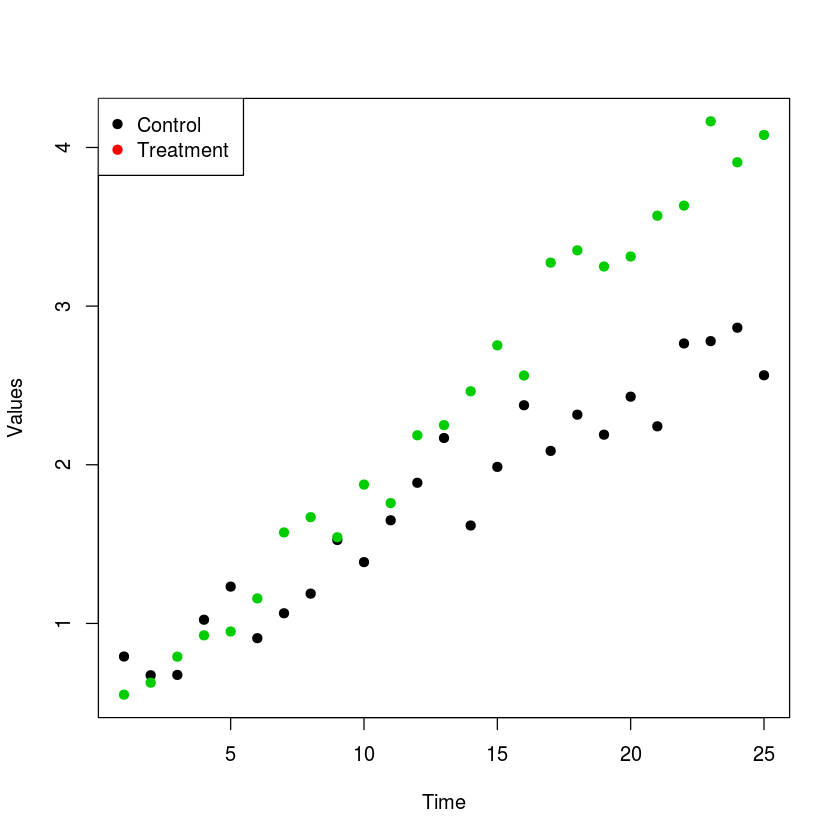

In [52]:
plot(complete$time,complete$values,col=complete$ind,xlab = "Time",ylab = "Values",pch=19)
legend("topleft",legend = c("Control","Treatment"),col = 1:2,pch=19)